In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
# import dataframe_image as dfi

In [4]:
import os
import sys
os.environ['PATH'] = sys.prefix + '/bin/' + ':' + os.environ['PATH']

### Примеры входных данных

In [5]:
# пример кода для запуска генератора данных
from data_generator.data_generator import generate_data

N = 5
bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
grid_size = 21
seed = 19
data = generate_data(N, bounds_params, grid_size, seed)

In [6]:
# Пример данных для NLP постановки
# plu_line - код продуктовой линейки
# plu - код товара
# plu_idx - индекс товара
# P - текущая цена
# Q - текущие продажи в штуках
# E - эластичность
# PC - цена конкурента/рыночная цена
# C - себестоимость товара
# x_lower - нижняя граница x для диапазона поиска цены
# x_upper - верхняя граница x для диапазона поиска цены
# x_init - начальное значение x для старта оптимизатора
# dfi.export(data['data_nlp'], './images/data_nlp_sample.png')
data['data_nlp']

plu_line_idx       P         Q         E      PC       C  plu_idx  \
0             0  141.99  0.478022 -2.455034  138.99  104.11        0   
1             1  115.99  3.359042 -0.665581  112.99   87.67        1   
2             1  115.99  3.359042 -0.366413  112.99   87.67        2   
3             2   99.99  0.781950 -1.431336   91.99   73.00        3   
4             3   51.99  3.604018 -0.841617   50.99   39.53        4   
5             4   89.99  3.906002 -0.432880   97.99  120.56        5   

    x_lower   x_upper  
0  0.900000  1.100000  
1  0.900000  1.100000  
2  0.900000  1.100000  
3  0.900000  1.057991  
4  0.900000  1.100000  
5  0.925564  1.100000

In [7]:
# Пример данных для MILP постановки
# plu_line - код продуктовой линейки
# P - текущая цена
# PC - цена конкурента/рыночная цена
# C - себестоимость товара
# Ps - сетка цен для поиска
# Qs - сетка продаж для кажой цены из Ps
# xs - сетка индексов
# grid_size - размер сетки
# P_idx - индекс текущей цены в сетке. Если значение -1, то текщая цена не попала в сетку
# dfi.export(data['data_milp'], './images/data_milp_sample.png')
data['data_milp']

plu_line_idx       P      PC       C  \
0             0  141.99  138.99  104.11   
1             1  115.99  112.99   87.67   
2             2   99.99   91.99   73.00   
3             3   51.99   50.99   39.53   
4             4   89.99   97.99  120.56   

                                                  Ps  \
0  [127.99, 128.99, 130.99, 131.99, 132.99, 134.9...   
1  [103.99, 105.99, 106.99, 107.99, 108.99, 109.9...   
2  [89.99, 90.99, 91.99, 92.99, 93.99, 94.99, 95....   
3  [46.99, 47.99, 48.99, 49.99, 50.99, 51.99, 52....   
4  [82.99, 83.99, 84.99, 85.99, 86.99, 87.99, 88....   

                                                  Qs  \
0  [0.6089394539338445, 0.5985012724198178, 0.578...   
1  [7.08731316001623, 7.0242781667422545, 6.99298...   
2  [0.9022928650366684, 0.889468741538329, 0.8768...   
3  [3.9078585400206394, 3.8451071816875837, 3.783...   
4  [4.039764869374558, 4.020379024402288, 4.00108...   

                                                  xs  grid_size  P_idx  n_plu  
0  [0.9014015071483906, 0.9084442566377914, 0.922...         21     10      1  
1  [0.8965428054142598, 0.9137856711785499, 0.922...         21     10      2  
2  [0.8999899989999, 0.90999099909991, 0.91999199...         17     10      1  
3  [0.9038276591652241, 0.9230621273321793, 0.942...         11      5      1  
4  [0.9222135792865874, 0.9333259251027892, 0.944...         17      7      1

### Пример запуска

In [8]:
from optimizers.optimization import pricing_optimization
from optimizers.optimizers import CvxpyLpOptimizationModel, ScipyLpOptimizationModel


In [21]:
bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
grid_size = 21

data = generate_data(2000, bounds_params, 21, 6)
M_cur = sum(data['data_nlp']['Q'] * (data['data_nlp']['P'] - data['data_nlp']['C']))
R_cur = sum(data['data_nlp']['Q'] * data['data_nlp']['P'])

opt_params = {
    'alpha': 0.0,
    'con_mrg': M_cur,
}

opt_params['alpha'] = 0.0


In [22]:
res1 = pricing_optimization(data, CvxpyLpOptimizationModel, opt_params, 'GLPK_MI')
R_opt = sum(res1['data']['P_opt'] * res1['data']['Q_opt'])
M_opt = sum((res1['data']['P_opt'] - res1['data']['C']) * res1['data']['Q_opt'])
res1['t'], R_opt, R_cur, M_opt, M_cur

Добавлено ограничение con_mrg с параметрами 88177.44357022514


(0.723520040512085,
 482308.0432108018,
 445506.3366907634,
 88177.55252214789,
 88177.44357022514)

In [28]:
res2 = pricing_optimization(data, ScipyLpOptimizationModel, opt_params, 'highs')
R_opt = sum(res2['data']['P_opt'] * res2['data']['Q_opt'])
M_opt = sum((res2['data']['P_opt'] - res2['data']['C']) * res2['data']['Q_opt'])
res2['t'], R_opt, R_cur, M_opt, M_cur

Добавлено ограничение con_mrg с параметрами 88177.44357022514
(1, 42000) (2000, 42000)


(0.8742785453796387,
 482290.8937564694,
 445506.3366907634,
 88177.97661508164,
 88177.44357022514)

### Пример Scipy.HiGHS

In [267]:
from optimizers.optimizers import OptimizationModel, ScipyLpOptimizationModel

In [268]:
scipy_lp_model = ScipyLpOptimizationModel(data)

In [272]:

scipy_lp_model.init_variables()
scipy_lp_model.init_objective()
scipy_lp_model.add_con_mrg(M_cur)
res = scipy_lp_model.solve()

### Отчет по времени работы и количеству "успешно" решенных задач

In [8]:
from runner import optimizers_collect_stat

In [9]:
stats_df = optimizers_collect_stat('./data/stat/')

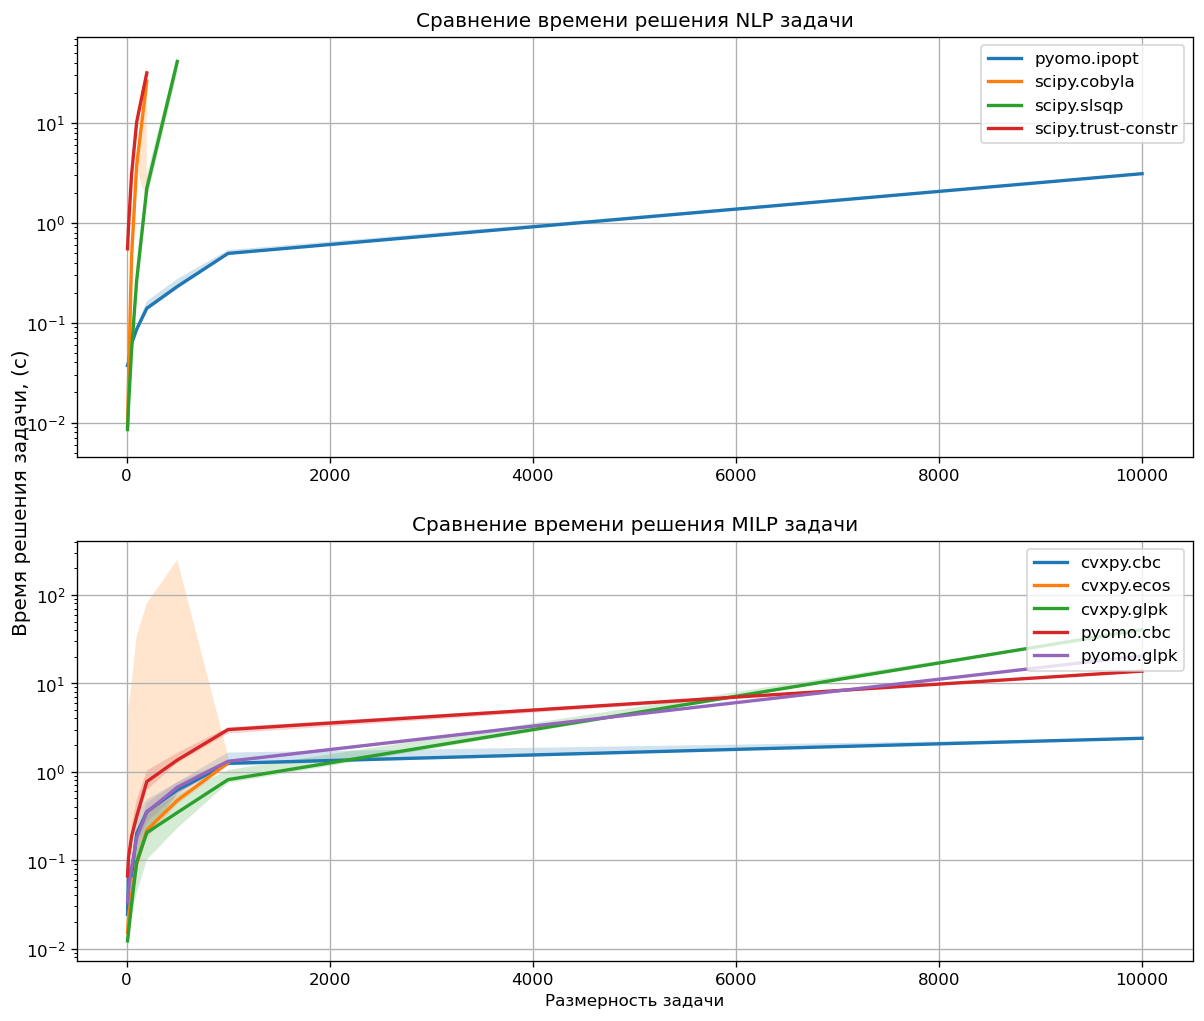

In [10]:
stats_df['success'] = stats_df['status'] == 'ok'
stats_df['opt_type'] = np.where(
    stats_df['solver'].isin(['scipy.slsqp', 'scipy.trust-constr', 'scipy.cobyla' ,'pyomo.ipopt']), 'nlp', 'lp'
)
time_rep_df = stats_df.groupby(['opt_type', 'solver', 'N'])['t'].describe().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=False, dpi=120)
for (opt_type, solver), df in time_rep_df.groupby(['opt_type', 'solver']):
    ax_id = 0 if opt_type == 'nlp' else 1
    axes[ax_id].plot(df['N'], df['50%'], lw=2, label=solver)
    axes[ax_id].fill_between(df['N'], df['25%'], df['75%'], alpha=0.2)
axes[0].set_title('Сравнение времени решения NLP задачи')
axes[1].set_title('Сравнение времени решения MILP задачи')
# [ax.set_xscale('log') for ax in axes]
[ax.set_yscale('log') for ax in axes]
[ax.legend(loc='upper right') for ax in axes]
[ax.grid() for ax in axes]
fig.text(0.08, 0.5, 'Время решения задачи, (с)', va='center', rotation='vertical', fontdict={'size': 12})
plt.xlabel('Размерность задачи')
plt.savefig('./images/time_solve_compare.png')
plt.show()


In [10]:
success_rate_df =\
    stats_df.groupby(['solver'])['success'].mean().reset_index().rename(columns={'success': 'success_rate'})
# dfi.export(success_rate_df, './images/success_rate.png')
success_rate_df


solver  success_rate
0           cvxpy.cbc      0.990521
1          cvxpy.ecos      0.700000
2          cvxpy.glpk      0.990521
3           pyomo.cbc      1.000000
4          pyomo.glpk      1.000000
5         pyomo.ipopt      1.000000
6        scipy.cobyla      0.513333
7         scipy.slsqp      0.955556
8  scipy.trust-constr      0.853333

### Пример запуска оптимизации(простой)

In [67]:
import numpy as np
from data_generator.data_generator import generate_data, price_round
from optimizers.optimization import pricing_optimization
from optimizers.optimizers import (
    ScipyNlpOptimizationModel,
    PyomoNlpOptimizationModel,
    PyomoLpOptimizationModel,
    CvxpyLpOptimizationModel,
)


def calc_metrics(df, tp='cur'):
    sfx = ''
    if tp == 'cur':
        sfx = ''
    elif tp == 'opt':
        sfx = '_opt'
    R_ = sum(df['P' + sfx] * df['Q' + sfx])
    M_ = sum((df['P' + sfx] - df['C']) * df['Q' + sfx])
    return R_, M_


def perc_delta(v_old, v_new, ndigits=2):
    p = round(100. * (v_new / v_old - 1.), ndigits)
    sign = '+' if p >= 0 else '-'
    return sign + str(abs(p)) + '%'


bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
grid_size = 21
#
data = generate_data(200, bounds_params, grid_size, 0)
# текущая выручка и маржа
R_cur, M_cur = calc_metrics(data['data_nlp'], 'cur')
# параметры для оптимизации
opt_params = {
    'alpha': 0.0,
    'con_mrg': M_cur,
}


"""
Тест расчёта на небольших данных
"""

res_nlp = pricing_optimization(data, PyomoNlpOptimizationModel, opt_params, 'ipopt')
res_milp = pricing_optimization(data, CvxpyLpOptimizationModel, opt_params, 'GLPK_MI')

R_opt_nlp, M_opt_nlp = calc_metrics(res_nlp['data'], 'opt')
R_opt_milp, M_opt_milp = calc_metrics(res_milp['data'], 'opt')

print('dR = {dR}, dM = {dM} - Изменение выручки и маржи в NLP задаче'.format(
    dR=perc_delta(R_cur, R_opt_nlp), dM=perc_delta(M_cur, M_opt_nlp)))
print('dR = {dR}, dM = {dM} - Изменение выручки и маржи в MILP задаче'.format(
    dR=perc_delta(R_cur, R_opt_milp),
    dM=perc_delta(M_cur, M_opt_milp)))

res_nlp['data']['P_opt'] = price_round(res_nlp['data']['P_opt'])
res_nlp['data']['x_opt'] = res_nlp['data']['P_opt'] / res_nlp['data']['P']
res_nlp['data']['Q_opt'] = res_nlp['data']['Q'] * np.exp(res_nlp['data']['E'] * (res_nlp['data']['x_opt'] - 1))
R_opt_nlp_ar, M_opt_nlp_ar = calc_metrics(res_nlp['data'], 'opt')

print('dR = {dR}, dM = {dM} - Изменение выручки и маржи в NLP задаче после округления'.format(
    dR=perc_delta(R_cur, R_opt_nlp_ar), dM=perc_delta(M_cur, M_opt_nlp_ar)))

ind = res_nlp['data'].groupby(['plu_line_idx'])['x_opt'].nunique().max() == 1
print(f'Все товары в линейке имеют одинаковые цены: {ind}')


dR = +7.06%, dM = +0.0% - Изменение выручки и маржи в NLP задаче
dR = +6.98%, dM = +0.0% - Изменение выручки и маржи в MILP задаче
dR = +6.98%, dM = -0.01% - Изменение выручки и маржи в NLP задаче после округления
Все товары в линейке имеют одинаковые цены: True


### Пример запуска оптимизации(сложный)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from data_generator.data_generator import generate_data
from optimizers.optimization import pricing_optimization
from optimizers.optimizers import (
    ScipyNlpOptimizationModel,
    PyomoNlpOptimizationModel,
    PyomoLpOptimizationModel,
    CvxpyLpOptimizationModel,
)

In [10]:
bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
grid_size = 21

data = generate_data(100, bounds_params, 21, 4)
M_cur = sum(data['data_nlp']['Q'] * (data['data_nlp']['P'] - data['data_nlp']['C']))
R_cur = sum(data['data_nlp']['Q'] * data['data_nlp']['P'])

opt_params = {
    'alpha': 0.0,
#     'con_mrg': M_cur,
}

opt_params['alpha'] = 0.0
res, t =  pricing_optimization(data, CvxpyLpOptimizationModel, opt_params, 'GLPK_MI')
M_opt_min = sum((res['data']['P_opt'] - res['data']['C']) * res['data']['Q_opt'])

opt_params['alpha'] = 1.0
res, t =  pricing_optimization(data, CvxpyLpOptimizationModel, opt_params, 'GLPK_MI')
M_opt_max = sum((res['data']['P_opt'] - res['data']['C']) * res['data']['Q_opt'])

N_grid = 30
M_grid = np.linspace(M_opt_min, M_opt_max, N_grid)
R_norm_res = np.zeros(N_grid)
M_norm_res = np.zeros(N_grid)
R_res = np.zeros(N_grid)
M_res = np.zeros(N_grid)


opt_params['alpha'] = 0.0
for i, M in enumerate(M_grid):
    opt_params['con_mrg'] = M
    res, t = pricing_optimization(data, CvxpyLpOptimizationModel, opt_params, 'GLPK_MI')
    R_norm_res[i] = sum(res['data']['P_opt']  * res['data']['Q_opt']) / R_cur
    M_norm_res[i] = sum((res['data']['P_opt'] - res['data']['C'])  * res['data']['Q_opt']) / M_cur

    R_res[i] = sum(res['data']['P_opt']  * res['data']['Q_opt'])
    M_res[i] = sum((res['data']['P_opt'] - res['data']['C'])  * res['data']['Q_opt'])
    

ValueError: too many values to unpack (expected 2)

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(R_res, M_res, label='Кривая оптимальности по Парето')
plt.axvline(R_cur, ls='--', c='k', label='текущие уровни')
plt.axhline(M_cur, ls='--', c='k')
plt.scatter(R_res[0], M_res[0], c='g', label='Оптимум по выручке', zorder=2)
plt.scatter(R_res[-1], M_res[-1], c='r', label='Оптимум по марже', zorder=2)
plt.xlabel('Выручка')
plt.ylabel('Маржа')
plt.grid()
plt.legend()
plt.show()

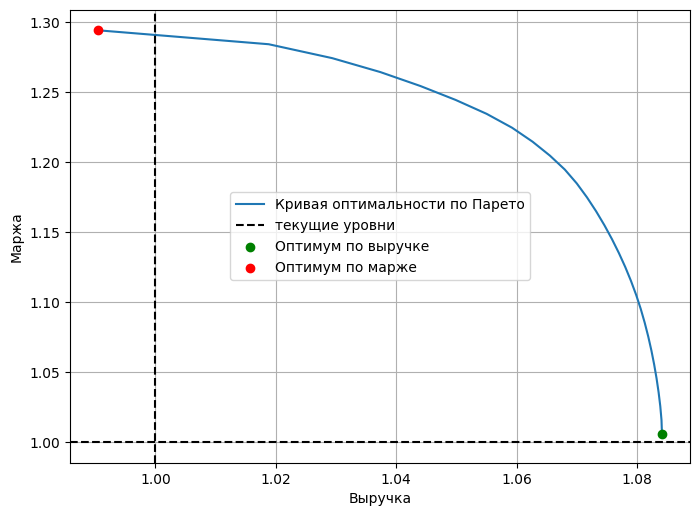

In [14]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(R_norm_res, M_norm_res, label='Кривая оптимальности по Парето')
plt.axvline(1, ls='--', c='k', label='текущие уровни')
plt.axhline(1, ls='--', c='k')
plt.scatter(R_norm_res[0], M_norm_res[0], c='g', label='Оптимум по выручке', zorder=2)
plt.scatter(R_norm_res[-1], M_norm_res[-1], c='r', label='Оптимум по марже', zorder=2)
plt.xlabel('Выручка')
plt.ylabel('Маржа')
plt.grid()
plt.legend()
plt.show()

### Запус MINLP с pyomo

In [17]:
from data_generator.data_generator import generate_data
from optimizers.optimization import pricing_optimization
from optimizers.optimizers import PyomoNlpOptimizationModel
from itertools import product

SEED_GRID = list(range(8))
N_GRID = list(range(5, 55, 5))
GRID = product(N_GRID, SEED_GRID)

bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
GRID_SIZE = 21
GRID = product(N_GRID, SEED_GRID)
minlp_stats_df_list = []

for N, seed in GRID:
    print(N, seed)
    data = generate_data(N, bounds_params, GRID_SIZE, seed)
    N_plu = len(data['data_nlp'])
    # текущая выручка и маржа
    R_cur, M_cur = calc_metrics(data['data_nlp'], 'cur')
    # параметры для оптимизации
    opt_params = {
        'alpha': 0.0,
        'con_mrg': M_cur,
        'con_chg_cnt':  int(0.7 * N_plu)
    }
    res_minlp, t_minlp = pricing_optimization(data, PyomoNlpOptimizationModel, opt_params, 'bonmin')
    minlp_stats_df_list.append(pd.DataFrame({
        'N': [N],
        'seed': [seed],
        't': [t_minlp],
        'status': [res_minlp['status']]
    }))
    
    print('minlp finished at %.3f' % t_minlp)
    print('--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--')
minlp_stats_df = pd.concat(minlp_stats_df_list)

minlp_stats_df.to_csv('./data/stat_minlp/stat.csv', index=None)

5 0
minlp finished at 0.346
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 1
minlp finished at 0.310
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 2
minlp finished at 0.289
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 3
minlp finished at 0.640
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 4
minlp finished at 0.722
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 5
minlp finished at 0.799
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 6
minlp finished at 0.376
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
5 7
minlp finished at 2.493
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
10 0
minlp finished at 1.051
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
10 1
minlp finished at 2.702
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--
10 2
minlp finished at 3.064
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--

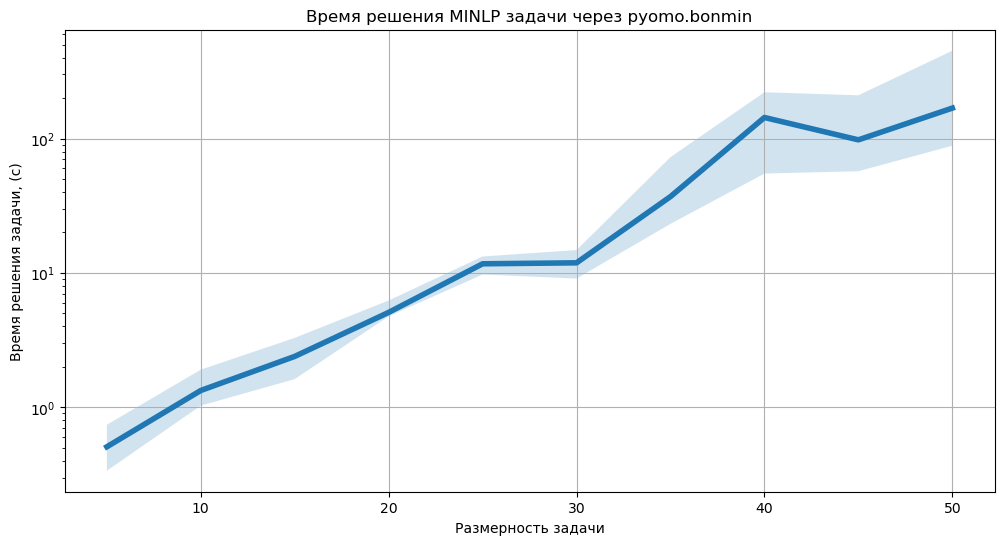

In [19]:
minlp_stats_df = pd.read_csv('./data/stat_minlp/stat.csv')
time_rep_df = minlp_stats_df.groupby(['N'])['t'].describe().reset_index()

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(time_rep_df['N'], time_rep_df['50%'], lw=4)
plt.fill_between(time_rep_df['N'], time_rep_df['25%'], time_rep_df['75%'], alpha=0.2)
# x = np.linspace(5, 30å, 100)
# y = 2.0e-1 * np.exp(0.225 * x)
# plt.plot(x, y)
plt.yscale('log')
plt.xlabel('Размерность задачи')
plt.ylabel('Время решения задачи, (с)')
plt.title('Время решения MINLP задачи через pyomo.bonmin')
plt.grid()
plt.savefig('./images/time_solve_minlp.png')
plt.show()

### Сравнение решений оптимизаторов

In [41]:
%%time
bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
N = 500
seed = 5
grid_size = 21

data = generate_data(N, bounds_params, 21, seed)
M_cur = sum(data['data_nlp']['Q'] * (data['data_nlp']['P'] - data['data_nlp']['C']))
R_cur = sum(data['data_nlp']['Q'] * data['data_nlp']['P'])

opt_params = {
    'alpha': 0.0,
    'con_mrg': M_cur
}

CPU times: user 309 ms, sys: 2.69 ms, total: 311 ms
Wall time: 311 ms


In [62]:
np.array([[9, 8], [9, 7]]).size

4

In [42]:
%%time
try:
    res_1 = pricing_optimization(data, PyomoNlpOptimizationModel, opt_params, 'ipopt')
    print(res_1['t'], res_1['status'])
except Exception as e:
    print(e)

0.30666089057922363 ok
CPU times: user 153 ms, sys: 13 ms, total: 166 ms
Wall time: 307 ms


In [47]:
%%time
try:
    res_2 = pricing_optimization(data, ScipyNlpOptimizationModel, opt_params, 'slsqp')
    print(res_2['t'], res_2['status'])
except Exception as e:
    print(e)

12.13930606842041 ok
CPU times: user 1min 1s, sys: 842 ms, total: 1min 2s
Wall time: 12.1 s


In [48]:
df = res_1['data'].copy()
print(sum(df['P_opt'] * df['Q_opt']), R_cur)
print(sum((df['P_opt'] - df['C']) * df['Q_opt']), M_cur)

120936.20702565346 111522.31767075682
23077.948812746516 23077.948952296254


In [49]:
df = res_2['data'].copy()
print(sum(df['P_opt'] * df['Q_opt']), R_cur)
print(sum((df['P_opt'] - df['C']) * df['Q_opt']), M_cur)

120936.20109566531 111522.31767075682
23077.94864376093 23077.948952296254


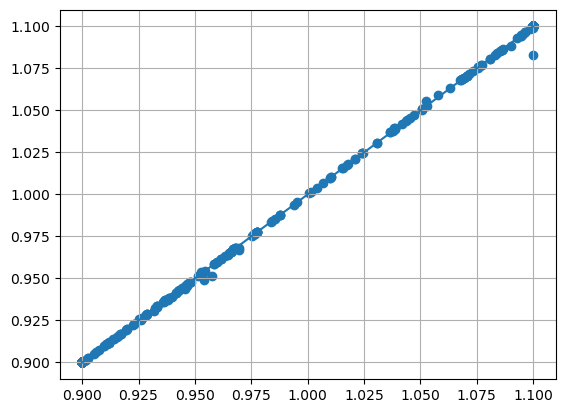

In [50]:
plt.scatter(res_1['data']['x_opt'], res_2['data']['x_opt'])
plt.plot([0.9, 1.1], [0.9, 1.1])
plt.grid()
plt.show()

### PyOptSparse

In [454]:
import pyoptsparse as pyos

In [455]:
df = data['data_nlp'].copy().sort_values('plu_idx')
plu_idx_in_line = data['plu_idx_in_line'].copy()
plu_line_idx = df['plu_line_idx'].values
plu_idx = df['plu_idx'].values
P = df['P'].values
Q = df['Q'].values
C = df['C'].values
E = df['E'].values
x_lower = df['x_lower'].values
x_upper = df['x_upper'].values

bounds = np.array([[None] * N] * 2, dtype=float)

for plu_line_idx_, plu_ in plu_idx_in_line.items():
    bounds[0][plu_line_idx_] = x_lower[plu_[0]]
    bounds[1][plu_line_idx_] = x_upper[plu_[0]]


In [456]:
def objective(x):
    x_ = x[plu_line_idx[plu_idx]]
    f = -10. * sum(P * Q * x_ * np.exp(E * (x_ - 1.))) / R_cur
    return f


In [457]:
def con_mrg(x):
    x_ = x[plu_line_idx[plu_idx]]
    f = sum((P * x_ - C) * Q * np.exp(E * (x_ - 1.)))
    return f


In [458]:
def functions(xdict):
    x = xdict['x']
    
    funcs = {}
    
    funcs['obj'] = objective(x)
    
    funcs['con_mrg'] = con_mrg(x)
        
    fails = False
    
    return funcs, fails



In [504]:
%%time
model = pyos.Optimization('', functions)

k_init = 0.5
model.addVarGroup('x', N, 'c', lower=bounds[0], upper=bounds[1], value=k_init * bounds[0] + (1-k_init) * bounds[1])

model.addObj('obj')

model.addCon('con_mrg', lower=1.0*M_cur, upper=None)


CPU times: user 1.77 ms, sys: 233 µs, total: 2 ms
Wall time: 1.77 ms


In [507]:
%%time
# opt_options = {"IPRINT": -1, 'MAXIT': 1000000, 'ACC': 1.0e-10}
# opt_options = {'file_print_level': 0, 'print_level': 0, 'sb': 'no'}
opt_options = {}

opt = pyos.OPT('conmin', options=opt_options)

CPU times: user 256 µs, sys: 3.66 ms, total: 3.91 ms
Wall time: 7.85 ms


In [508]:
%%time
sol = opt(model, sens='FD')

CPU times: user 15.9 s, sys: 313 ms, total: 16.2 s
Wall time: 16.7 s


In [509]:
df['x_opt'] = sol.xStar['x'][plu_line_idx[plu_idx]]
df

plu_line_idx       P         Q         E      PC       C  plu_idx  \
0               0   65.99  3.660779 -4.316118   74.99   72.74        0   
1               1  161.99  1.137208 -2.657612  158.99  110.58        1   
2               1  161.99  1.137208 -0.947011  158.99  110.58        2   
3               2   80.99  3.269954 -0.023438   88.99   56.95        3   
4               2   80.99  3.269954 -0.018374   88.99   56.95        4   
..            ...     ...       ...       ...     ...     ...      ...   
660           496  111.99  2.175788 -2.113577  103.99   93.50      660   
661           496  111.99  2.175788 -1.094159  103.99   93.50      661   
662           497   70.99  4.032711 -0.401283   66.99   87.61      662   
663           498  131.99  0.478842 -5.098386  139.99  107.39      663   
664           499  103.99  0.429002 -0.873377   98.99   89.88      664   

      x_lower   x_upper     x_opt     Q_opt       P_opt  
0    0.965927  1.100000  0.965927  4.240752   63.741500  
1    0.900000  1.100000  0.900000  1.483401  145.791000  
2    0.900000  1.100000  0.900000  1.250167  145.791000  
3    0.933961  1.100000  1.100000  3.262299   89.089000  
4    0.933961  1.100000  1.100000  3.263951   89.089000  
..        ...       ...       ...       ...         ...  
660  0.900000  1.067850  0.900000  2.687869  100.791000  
661  0.900000  1.067850  0.900000  2.427367  100.791000  
662  0.900000  1.085202  1.085202  3.897162   77.038500  
663  0.901519  1.100000  0.901519  0.791132  118.991500  
664  0.900000  1.094706  1.046008  0.412106  108.774326  

[665 rows x 12 columns]

In [510]:
df['Q_opt'] = df['Q'] * np.exp(df['E'] * (df['x_opt'] - 1))
df['P_opt'] = df['x_opt'] * df['P']
print(sum(df['P_opt'] * df['Q_opt']), R_cur)
print(sum((df['P_opt'] - df['C']) * df['Q_opt']), M_cur)


120929.72934161084 111522.31767075682
23077.947325725152 23077.948952296254


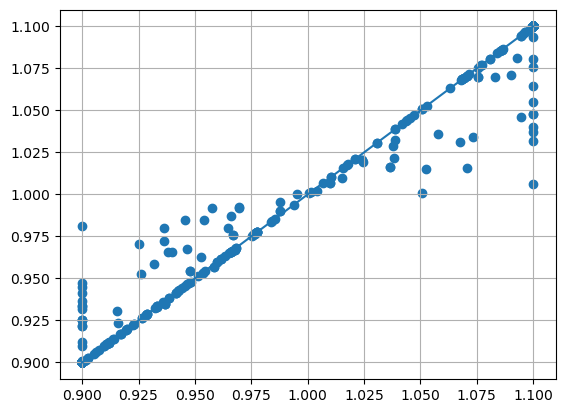

In [511]:
plt.scatter(res_1['data']['x_opt'], df['x_opt'])
plt.plot([0.9, 1.1], [0.9, 1.1])
plt.grid()
plt.show()

In [512]:
(df['x_opt'] <= df['x_upper']).mean(), (df['x_opt'] >= df['x_lower']).mean()

(1.0, 1.0)

In [513]:
sol.optInform

{}

### Тестовые примеры с pytest